In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv(url, names=columns, index_col='Id')

# 특성과 레이블 분리
X = data.drop(columns=['Type'])
y = data['Type']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


D:\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


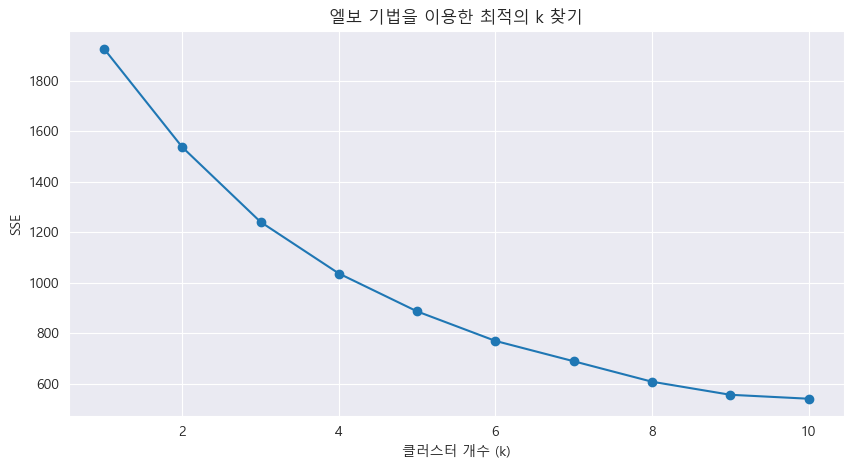

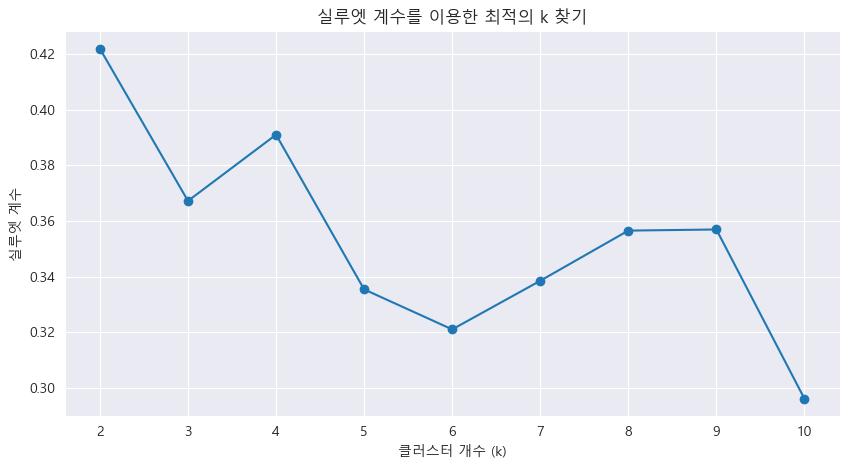

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.font_manager as fm

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 엘보 기법
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('SSE')
plt.title('엘보 기법을 이용한 최적의 k 찾기')
plt.show()

# 실루엣 계수
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('실루엣 계수')
plt.title('실루엣 계수를 이용한 최적의 k 찾기')
plt.show()


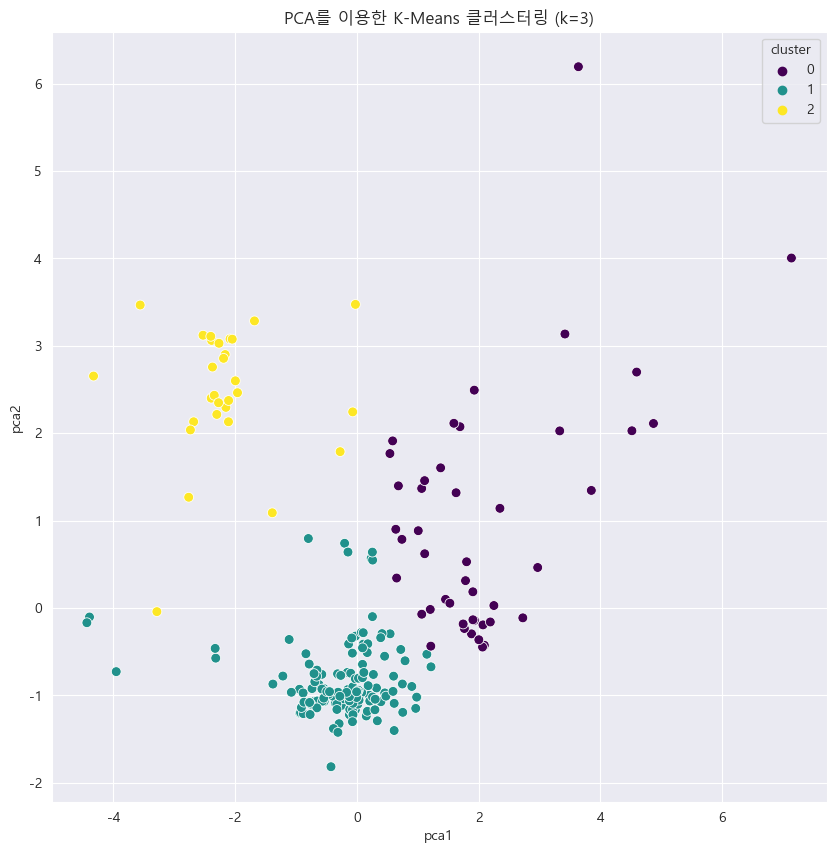

In [25]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 최적의 클러스터 개수 설정 (예: 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 주성분 분석(PCA)을 통한 2D 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
data['pca1'] = components[:, 0]
data['pca2'] = components[:, 1]
data['cluster'] = labels

plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='viridis', s=50)
plt.title(f'PCA를 이용한 K-Means 클러스터링 (k={optimal_k})')
plt.show()


In [26]:
# 샘플 데이터 정의 (예: 임의의 화학적 성분 값)
sample_data = np.array([[1.516, 13.0, 3.6, 1.2, 72.73, 0.6, 8.75, 0.0, 0.0]])

# 샘플 데이터 표준화
sample_data_scaled = scaler.transform(sample_data)

# 샘플 데이터 클러스터 예측
sample_label = kmeans.predict(sample_data_scaled)

print(f"샘플 데이터는 클러스터 {sample_label[0]}에 속합니다.")


샘플 데이터는 클러스터 1에 속합니다.


D:\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
# 기존 데이터에 예측된 클러스터 레이블 추가
data['predicted_cluster'] = labels

# Type 컬럼과 예측된 클러스터 컬럼만 선택
output_data = data[['Type', 'predicted_cluster']]

# CSV 파일로 저장
output_file_path = "./glass_clustering_results.csv"
output_data.to_csv(output_file_path, index=False)

print(f"CSV 파일이 저장되었습니다: {output_file_path}")


CSV 파일이 저장되었습니다: ./glass_clustering_results.csv


In [28]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Adjusted Rand Index (ARI) 계산
ari_score = adjusted_rand_score(data['Type'], data['predicted_cluster'])

# Normalized Mutual Information (NMI) 계산
nmi_score = normalized_mutual_info_score(data['Type'], data['predicted_cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")


Adjusted Rand Index (ARI): 0.1889
Normalized Mutual Information (NMI): 0.2746


KeyError: 'quality'